In [12]:
import glob
import numpy as np
import random
import librosa
import os
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelBinarizer

import tensorflow as tf
from tensorflow import keras

print(tf.__version__)

2.1.0


In [15]:
class_names = os.listdir("../feature/feature_mfcc/")
class_names.sort()

print(class_names)

x_list = []
y_list = []

for i in range(0,len(class_names)):
    files=os.listdir("../feature/feature_mfcc/"+class_names[i])
    files = [file for file in files if file.endswith(".npy")]
    print(class_names[i].split('_')[0])

    for j in range(0, len(files)):
        print(files[j], j)
        x = np.load("../feature/feature_mfcc/"+class_names[i]+"/"+files[j])
        x=x.T
        x_list.append(x)
        y_list.append(i)
print(type(x))
print(y_list)
# print(x_list)

['2017019740001_kwakjuheon', '2017019740002_kimjiho', '2017019740003_songyejin', '2017019740004_parksohui', '2017019740005_moonyeonwoo', '2017019740006_kangsubin', '2017019740007_leekyeongeun', '2017019740008_chochaeyeon', '2017019740009_shindonghwan', '2017019740010_kwakmirae', '2017019740011_kimhyeryeong', '2017019740012_chaeminjoon', '2017019740013_kwakyiheon', '2017019770001_kwonyuna', '2017019770002_kwoneunkyung', '2017019770003_johaesu', '2017019770004_leebyeongjin', '2017019770005_hyeonsanghyeok', '2017019770006_jennie', '2017019770007_simseungmin', '2017019770008_parksomi', '2017019770009_yuminji', '2017019770010_parksojin', '2017019770011_kwonyeonwoo', '2017019770012_ladakyeong', '2017019770013_janghyomin', '2017019770014_parkeunbi', '2017019770015_parkdayeung', '2017019770016_parkjongae', '2017019770017_hansohee', '2017019770018_janggyeoul', '2017019770019_leewooju', '2017019770020_nomyungok', '2017019770021_heoyoonjung', '2017019770022_heojaemin', '2017019770023_kimsoyung', 

In [16]:
x_train = np.array(x_list)
y_train = np.array(y_list)

print("x_train:", x_train.shape)
print("y_train:", y_train.shape)

x_train: (235, 12, 469)
y_train: (235,)


In [17]:
from sklearn.model_selection import train_test_split
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, stratify=y_train, test_size=0.2, random_state=42)

In [18]:
from tensorflow.keras.utils import to_categorical
y_train_encoded = tf.keras.utils.to_categorical(y_train)
y_val_encoded = tf.keras.utils.to_categorical(y_val)

In [19]:
from tensorflow.keras.layers import SimpleRNN
from tensorflow.keras.layers import Flatten, Dense,Dropout,TimeDistributed, Embedding, Bidirectional
from tensorflow.keras.models import Sequential

In [20]:
#print(x_train.shape)
#print(x_train.shape[2])

n_features = x_train.shape[1]
max_length = x_train.shape[2]
input_shape = (n_features, max_length)
dropout = 0.25
n_classes = len(class_names)
n_epochs = 15
batch_size = 16

print(input_shape)

(12, 469)


In [21]:

model2 = Sequential()
model2.add(SimpleRNN(64, return_sequences=True, input_shape=input_shape,dropout=dropout))
#model2.add(Bidirectional(SimpleRNN(128, return_sequences=True)))
model2.add(Bidirectional(SimpleRNN(64, return_sequences=True)))
#model2.add(SimpleRNN(128, return_sequences = True))
#model2.add(Dropout(dropout))
#model2.add(TimeDistributed(Dense(128, activation='relu')))
#model2.add(Dropout(dropout))
model2.add(Flatten())
#model2.add(Dense(128, activation='relu'))
#model2.add(Dense(64, activation='relu'))
#model2.add(Dropout(dropout))
model2.add(Dense(n_classes, activation='softmax'))
#model2.compile(loss='mse', optimizer='sgd')

In [22]:
model2.compile(loss=tf.keras.losses.categorical_crossentropy, metrics=["accuracy"], optimizer=keras.optimizers.SGD(lr=0.01, momentum=0.0, decay=0.0, nesterov=False))

In [23]:
history2 = model2.fit(x_train, y_train_encoded, 
                    batch_size=batch_size, epochs=n_epochs, 
                    verbose=2,shuffle=True,
                    validation_data=(x_val, y_val_encoded))

Train on 188 samples, validate on 47 samples
Epoch 1/15
188/188 - 1s - loss: 4.2031 - accuracy: 0.0266 - val_loss: 4.1650 - val_accuracy: 0.0213
Epoch 2/15
188/188 - 0s - loss: 3.8703 - accuracy: 0.0745 - val_loss: 4.0413 - val_accuracy: 0.0426
Epoch 3/15
188/188 - 0s - loss: 3.4858 - accuracy: 0.1223 - val_loss: 3.9678 - val_accuracy: 0.0851
Epoch 4/15
188/188 - 0s - loss: 3.1806 - accuracy: 0.1968 - val_loss: 3.9313 - val_accuracy: 0.0638
Epoch 5/15
188/188 - 0s - loss: 2.9163 - accuracy: 0.2713 - val_loss: 3.7888 - val_accuracy: 0.1064
Epoch 6/15
188/188 - 0s - loss: 2.5241 - accuracy: 0.4574 - val_loss: 3.7585 - val_accuracy: 0.1489
Epoch 7/15
188/188 - 0s - loss: 2.4095 - accuracy: 0.4840 - val_loss: 3.7153 - val_accuracy: 0.1277
Epoch 8/15
188/188 - 0s - loss: 2.0378 - accuracy: 0.6383 - val_loss: 3.6009 - val_accuracy: 0.1489
Epoch 9/15
188/188 - 0s - loss: 1.9100 - accuracy: 0.6489 - val_loss: 3.4895 - val_accuracy: 0.1702
Epoch 10/15
188/188 - 0s - loss: 1.6598 - accuracy: 0.7

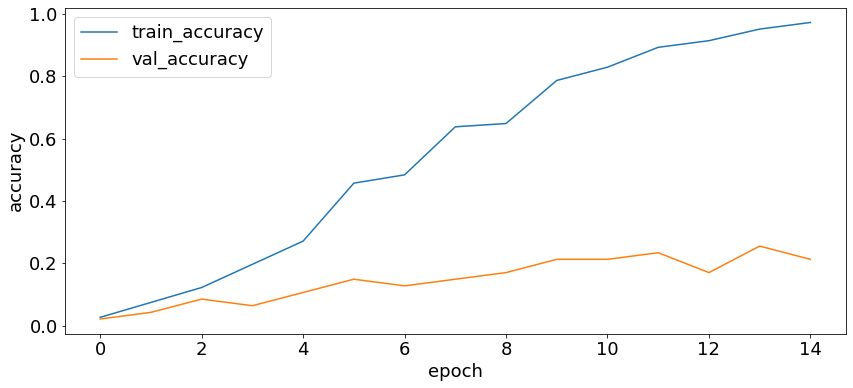

In [24]:
import matplotlib.pyplot as plt

plt.figure(figsize=(14, 6))
plt.rc('font', size=18)

plt.plot(history2.history["accuracy"])
plt.plot(history2.history["val_accuracy"])
plt.ylabel("accuracy")
plt.xlabel("epoch")
plt.legend(["train_accuracy", "val_accuracy"])
plt.show()